# Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read & Analyze Data

In [2]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Comment:**

Tập dữ liệu mô tả một vài yếu tố cho một căn nhà, gồm 3 thuộc tính đều có kiểu dữ liệu dạng numeric:
- `size (square feet)` (biến liên tục): diện tích căn nhà
- `number of bedrooms` (biến rời rạc): số phòng ngủ
- `price ($S)` (biến liên tục): giá căn nhà

Trong đó, thuộc tính giá căn nhà phụ thuộc vào hai yếu tố là diện tích và số phòng ngủ.

In [3]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


**Comment:** xét từng thuộc tính:

- `size (square feet)`:
    - Dựa vào khoảng tứ phân vị: dữ liệu phân bố lệch trái.
    - Độ lệch chuẩn lớn: dữ liệu phân tán rộng.
    
- `number of bedrooms`:
    - Độ lệch chuẩn lớn: dữ liệu phân tán thấp, chỉ gồm các giá trị: 1, 2, 3, 4 ,5
    
- `price ($)`: 
    - Dựa vào khoảng tứ phân vị: dữ liệu phân bố lệch trái.
    - Độ lệch chuẩn lớn: dữ liệu phân tán rộng.
    
Tất cả các thuộc tính đều có 47 giá trị, nên tập dữ liệu không chứa giá trị thiếu (missing values).



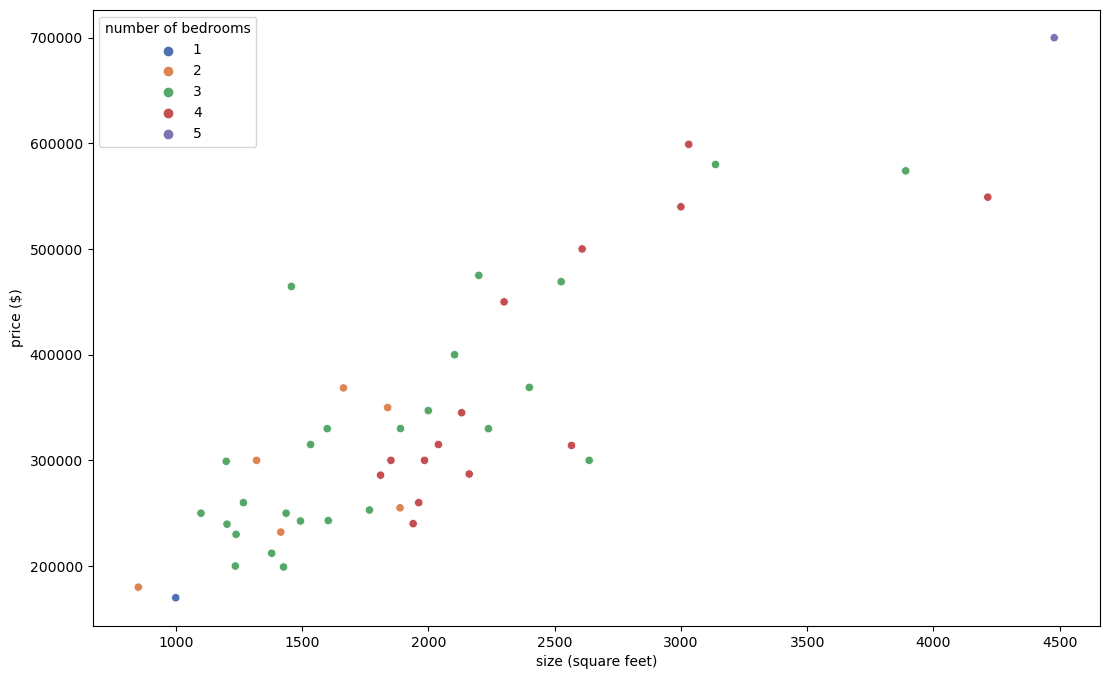

In [4]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

**Comment**: biểu đồ phân tán cho ta thấy:

- Màu sắc các điểm dữ liệu cho thấy: số lượng căn nhà có 3 hoặc 4 phòng ngủ chiếm đa số.
- Hình dạng các điểm dự liệu phân tán cho thấy:
    - Diện tích căn nhà càng lớn thì giá nhà có xu hướng càng cao và số lượng phòng ngủ càng nhiều.
    - Giữa 2 thuộc tính giá nhà và diện tích có mối quan hệ tuyến tính với nhau (các điểm dữ liệu trên đồ thị phân bố có hình dạng tuyến tính), trong đó:
        - size (square feet): là biến độc lập.
        - price ($): là biến phụ thuộc.

# Helper Functions

In [5]:
def standardize_train_set(X):
    """
    mu: giá trị mean
    sigma: phương sai (standard deviation)
    X_norm: giá trị sau chuẩn hoá
    """
    #todo
    mu = np.mean(X, axis=0)
    #todo
    sigma=np.std(X, axis=0)
    #todo
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [6]:
def standardize_test_set(X, mu, sigma):
    #todo
    X_norm=(X-mu.values)/sigma.values
    return X_norm

In [13]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
        
    def calculate_absolute_error(self, X, y, theta):
        return np.sum(np.abs(X.dot(theta)-y))/(len(X))
    
    def gradient(self, X, y, theta): #cost_function
        m = len(y)
        #todo
        h_theta = np.dot(X,theta)
        loss = h_theta - y #y_pred-y

        #todo
        dJ = (1/m)*(X.T.dot(loss))  # Determine derivative of cost function
        J = np.sum((loss ** 2) / (2*m)) # determine the cost function
        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ = self.gradient(X,y,theta)
            #todo
            theta=theta-self.alpha*dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []
        X = np.c_[np.ones(len(X),dtype='int64'),X] 
        for Xi in X:
            #todo
            results.append(Xi.dot(self.theta))
        return results

# Main Function

## Train Model

In [14]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)
#Feature-Label split
#todo
X = df.iloc[:,:-1]
#todo
y = df.iloc[:, [-1]]
#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)
X_train=X.to_numpy()
y_train=y.iloc[:47,:].to_numpy()
y_train=y_train.flatten()
X=X_train
y=y_train
model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)


The total of training sample: 47


## Visualize Model

In [15]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), df['size (square feet)'].max()),
                 np.linspace(df['number of bedrooms'].min(), df['number of bedrooms'].max()))
surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 'number of bedrooms': y_surf.ravel()})
predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

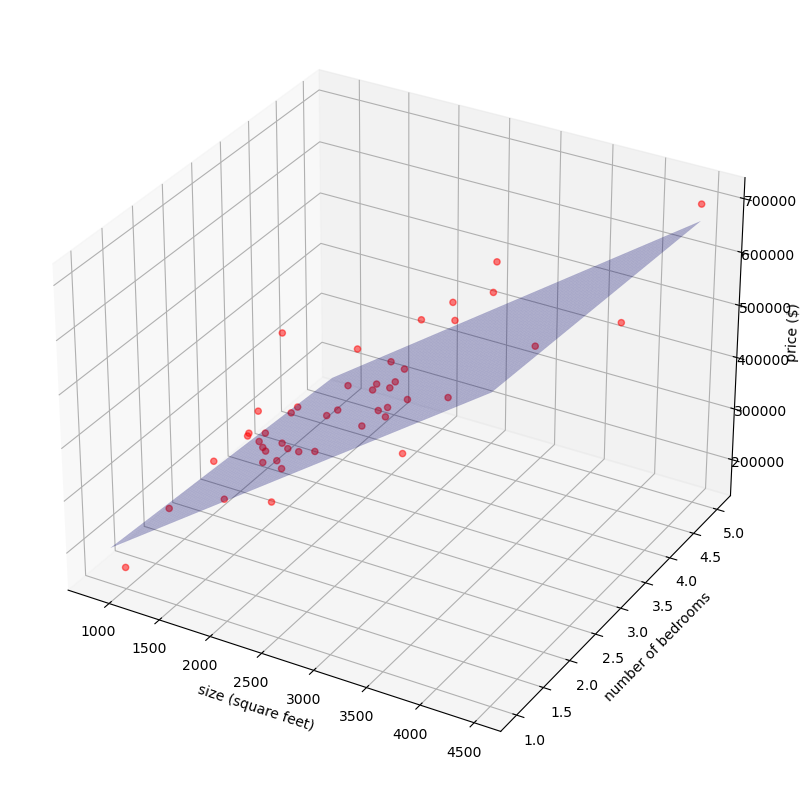

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

**Comment:**
- Mặt phẳng dự đoán giá căn nhà theo diện tích  và số phòng ngủ:
    - Có hình dạng hướng lên trong không gian 3D, phù hợp với xu hướng của dữ liệu: khi diện tích càng lớn và số phòng ngủ càng nhiều thì giá căn nhà có xu hướng càng cao.
    - Mặt phẳng khá fit so với các điểm dữ liệu của tập dữ liệu training (khoảng cách từ các điểm dữ liệu đến mặt phẳng dự đoán không quá lớn).

## Predict Sample

In [17]:
sample = [1650, 3]
#todo
paramNorm=(np.array(sample)-mu)/sigma
param = np.hstack((np.array([1]), paramNorm))
theta=model.theta
y_predict = np.dot(theta, param)
print(f'House price expected is {round(y_predict)}$')

House price expected is 293222$


## Save Results

In [18]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': dict(enumerate(map(str, theta)))}, f)
#Save prediction result
with open('price.json', 'w') as f:
    result = {
        #todo
        'size (square feet): ': dict(enumerate(map(str,x_surf.ravel()))),
        #todo
        'number of bedrooms': dict(enumerate(map(str,y_surf.ravel()))),
        #todo
        'price ($)': dict(enumerate(map(str,predicted)))
    }
    json.dump(result, f)